In [2]:
import cv2
from PIL import Image
from glob import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.training import saver
import matplotlib.pyplot as plt
from keras.layers import *
from tqdm import tqdm

Créer des fonctions d'ensemble de formation

In [29]:
def createGrayTrain(path):
    x_train = []
    y_train = []

    i = 0
    for img_path in tqdm(glob(path + '/*/*.jpg')):
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (300, 300), interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

        x_train.append(gray)
        typeName = img_path.split('/')[-2]
        if typeName == 'amborella':
            y_train.append(0)
        elif typeName == 'castanea':
            y_train.append(1)
        elif typeName == 'convolvulaceae':
            y_train.append(2)
        elif typeName == 'desmodium':
            y_train.append(3)
        elif typeName == 'eugenia':
            y_train.append(4)
        elif typeName == 'laurus':
            y_train.append(5)
        elif typeName == 'litsea':
            y_train.append(6)
        elif typeName == 'magnolia':
            y_train.append(7)
        elif typeName == 'monimiaceae':
            y_train.append(8)
        elif typeName == 'rubus':
            y_train.append(9)
        elif typeName == 'ulmus':
            y_train.append(10)
        i += 1
    return x_train, y_train

Création d'un ensemble d'entraînement

In [30]:
train_path = "./resource/TrainGray/"
x_train, y_train = createGrayTrain(train_path)

100%|██████████| 221/221 [00:32<00:00,  6.78it/s]


In [38]:
test_path = "./resource/TestGray/"
x_test, y_test = createGrayTrain(test_path)

100%|██████████| 112/112 [00:17<00:00,  6.41it/s]


In [31]:
x_train = tf.cast(x_train, dtype=tf.float32)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32) / 255
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_train = tf.one_hot(y_train, depth=11)

In [39]:
x_test = tf.cast(x_test, dtype=tf.float32)

x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) / 255

y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

y_test = tf.one_hot(y_test, depth=11)


Montrez 16 images de l'ensemble d'entraînement et assurez-vous que les données d'entrée sont correctes.

Construire le modèle, qui est séquentiel, avec une couche d'entrée, deux couches cachées et une couche de sortie, en utilisant l'optimiseur Adam.

In [59]:
# Build model
model = keras.Sequential()

# 添加卷积层
model.add(Conv2D(16, kernel_size=[16, 16], padding="valid", activation=tf.nn.relu)),
model.add(MaxPool2D(pool_size=[16, 16], strides=1, padding='valid')),
model.add(Conv2D(16, kernel_size=[16, 16], padding="valid", activation=tf.nn.relu)),
# 池化核，填充
model.add(MaxPool2D(pool_size=[16, 16], strides=1, padding='valid')),
# model.add(Conv2D(16, kernel_size=[16, 16], padding="valid", activation=tf.nn.relu)),
# # 池化核，填充
# model.add(MaxPool2D(pool_size=[16, 16], strides=1, padding='valid')),
# model.add(Conv2D(16, kernel_size=[16, 16], padding="valid", activation=tf.nn.relu)),
# # 池化核，填充
# model.add(MaxPool2D(pool_size=[16, 16], strides=1, padding='valid')),

model.add(Dropout(0.4)),
model.add(Flatten(input_shape=[300, 300, 1]))
model.add(Dense(64, activation='relu')),  # hidden layer
model.add(Dense(32, activation='relu')),  # hidden layer
model.add(Dense(11, activation='softmax'))  # output layer

model.build(input_shape=[None, 300, 300, 1])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.2),
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )


Commencez à former le modèle

In [57]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 285, 285, 16)      4112      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 270, 270, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 255, 255, 16)      65552     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 240, 240, 16)     0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 240, 240, 16)      0         
                                                                 
 flatten_10 (Flatten)        (None, 921600)          

Epoch 1/20


2022-12-05 22:08:09.697499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 31s 2s/step - loss: 71449824.0000 - accuracy: 0.1041
Epoch 2/20
19/19 [==============================] - 31s 2s/step - loss: 2.4129 - accuracy: 0.1584
Epoch 3/20
19/19 [==============================] - 31s 2s/step - loss: 2.3534 - accuracy: 0.2081
Epoch 4/20
19/19 [==============================] - 30s 2s/step - loss: 2.3580 - accuracy: 0.2081
Epoch 5/20
19/19 [==============================] - 30s 2s/step - loss: 2.3721 - accuracy: 0.2081
Epoch 6/20
19/19 [==============================] - 30s 2s/step - loss: 2.3729 - accuracy: 0.2081
Epoch 7/20
19/19 [==============================] - 30s 2s/step - loss: 2.3787 - accuracy: 0.2081
Epoch 8/20
19/19 [==============================] - 30s 2s/step - loss: 2.3730 - accuracy: 0.2081
Epoch 9/20
19/19 [==============================] - 31s 2s/step - loss: 2.3725 - accuracy: 0.2081
Epoch 10/20
19/19 [==============================] - 31s 2s/step - loss: 2.3723 - accuracy: 0.2081
Epoch 11/20
19/19 [====

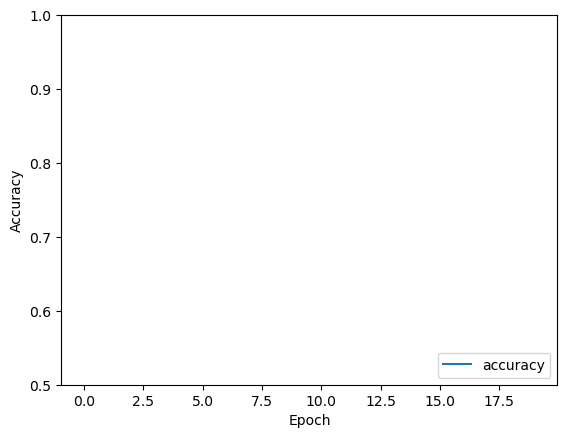

In [53]:
# Train model
history = model.fit(x_train, y_train, batch_size=12, epochs=20, shuffle=True)

Créer des fonctions d'ensemble de test

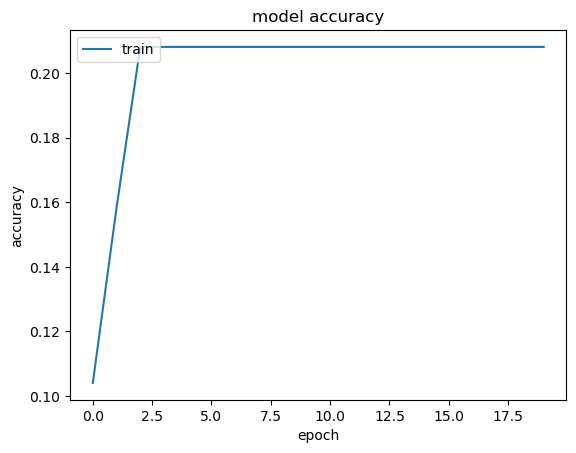

In [56]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def createTest(path):
    # test_path = "./resource/Test/"
    nub_test = len(glob(path + '/*/*.jpg'))
    #先生成空array，然后往里填每张图片的array
    x_test = np.zeros((nub_test, 600, 360, 3), dtype=np.uint8)
    y_test = np.zeros((nub_test,), dtype=np.uint8)

    j = 0
    for img_path in tqdm(glob(path + '/*/*.jpg')):
        img = Image.open(img_path)
        img = img.resize((360, 600))  #图片resize
        arr = np.asarray(img)  #图片转array
        x_test[j, :, :, :] = arr  #赋值
        typeName = img_path.split('/')[-2]
        # typeName = "castanea"
        if typeName == 'amborella':
            y_test[j] = 0
        elif typeName == 'castanea':
            y_test[j] = 1
        elif typeName == 'convolvulaceae':
            y_test[j] = 2
        elif typeName == 'desmodium':
            y_test[j] = 3
        elif typeName == 'eugenia':
            y_test[j] = 4
        elif typeName == 'laurus':
            y_test[j] = 5
        elif typeName == 'litsea':
            y_test[j] = 6
        elif typeName == 'magnolia':
            y_test[j] = 7
        elif typeName == 'monimiaceae':
            y_test[j] = 8
        elif typeName == 'rubus':
            y_test[j] = 9
        elif typeName == 'ulmus':
            y_test[j] = 10
        j += 1
    return x_test, y_test

Création d'ensembles de tests

In [ ]:
x_test, y_test = createTest("./resource/TestMasked/")

Évaluer l'exactitude du modèle

In [40]:
# Evaluate model
valid_loss, valid_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Valid loss:{valid_loss}")
print(f"Valid accuracy:{valid_acc}")

2022-12-05 21:39:30.874650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 584ms/step - loss: 2.3828 - accuracy: 0.1696
Valid loss:2.382754325866699
Valid accuracy:0.1696428656578064


Préservation des modèles

In [58]:
# 模型保存，注意：仅仅是多了一个save_format的参数而已
# 注意：这里的'path_to_saved_model'不再是模型名称，仅仅是一个文件夹，模型会保存在这个文件夹之下
model.save('saved_model', save_format='tf')

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Modèles de chargement

In [ ]:
# 加载模型，通过指定存放模型的文件夹来加载
model = keras.models.load_model('saved_model')

Modèles d'affichage

In [45]:
def typePredict(typeName):
    if typeName == 'amborella':
        flower = 'amborella, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: oui'
    elif typeName == 'castanea':
        flower = 'castanea, Bord: denté, Phyllotaxie: alterné, Type feuille: simple. Ligneux: oui'
    elif typeName == 'convolvulaceae':
        flower = 'convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non'
    elif typeName == 'desmodium':
        flower = 'desmodium, Bord: lisse, Phyllotaxie: alterné, Type feuille: composée. Ligneux: non'
    elif typeName == 'eugenia':
        flower = 'eugenia, Bord: lisse, Phyllotaxie: opposé, Type feuille: simple. Ligneux: oui'
    elif typeName == 'laurus':
        flower = 'laurus, Bord: lisse, Phyllotaxie: opposé, Type feuille: simple. Ligneux: oui'
    elif typeName == 'litsea':
        flower = 'litsea, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: oui'
    elif typeName == 'magnolia':
        flower = 'magnolia, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: oui'
    elif typeName == 'monimiaceae':
        flower = 'monimiaceae, Bord: lisse, Phyllotaxie: opposé, Type feuille: simple. Ligneux: oui'
    elif typeName == 'rubus':
        flower = 'rubus, Bord: denté, Phyllotaxie: alterné, Type feuille: composée. Ligneux: oui'
    elif typeName == 'ulmus':
        flower = 'ulmus, Bord: denté, Phyllotaxie: alterné, Type feuille: simple. Ligneux: oui'
    return flower

Faire des prédictions de modèle

In [46]:
# Make one prediction
class_names = ['amborella', 'castanea', 'convolvulaceae', 'desmodium', 'eugenia', 'laurus', 'litsea', 'magnolia',
               'monimiaceae', 'rubus', 'ulmus']
y_predicts = model.predict(x_test)

for i in range(0, 31):
    y_index = np.argmax(y_predicts[i])
    y_label = class_names[y_index]
    print("Number ", i, " is: ", typePredict(y_label))

4/4 [==============================] - 2s 661ms/step
Number  0  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  1  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  2  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  3  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  4  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  5  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  6  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  7  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  8  is:  convolvulaceae, Bord: lisse, Phyllotaxie: alterné, Type feuille: simple. Ligneux: non
Number  9  is:  convolvulacea